In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

1. Survived 열 요약
- 생존자/사망자 전체 비율
- 성별에 따른 생존자/사망자

In [2]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
surv = titanic["survived"].value_counts()
surv

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:ylabel='survived'>

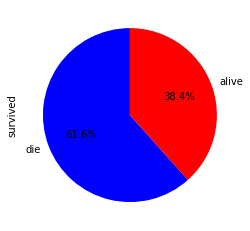

In [4]:
# 사망자 / 생존자 비율
surv.plot.pie(labels = ["die","alive"],
              autopct="%.1f%%",
              startangle = 90,
              colors = ["b","r"])

<AxesSubplot:xlabel='sex', ylabel='count'>

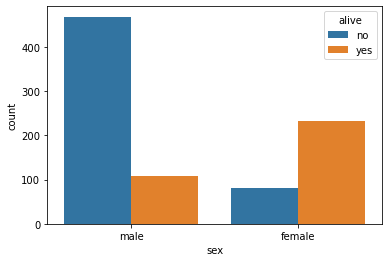

In [5]:
# 성별에 따른 생존자/사망자

# sex_surv = titanic.pivot_table(index = "survived", columns = "sex", aggfunc = "size")
# sex_surv
sns.countplot(data = titanic, x = "sex", hue = "alive")

2. Pclass 열 요약
- 등실 비율
- 등실에 따른 생존자/사망자 비율

In [6]:
titanic["pclass"].value_counts(sort=False)

1    216
2    184
3    491
Name: pclass, dtype: int64

<AxesSubplot:ylabel='pclass'>

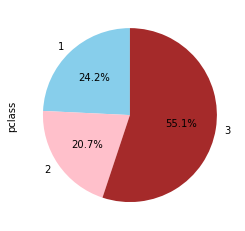

In [7]:
# 등실 비율

# 1. plot.pie
pclass = titanic["pclass"].value_counts(sort=False)
pclass.plot.pie(autopct = "%.1f%%",
                                          startangle = 90,
                                          labels = ["1","2","3"],
                                          colors = ["skyblue","pink","brown"])

In [33]:
# 2. plotly.pie
fig = px.pie(pclass, names = pclass.index, values = pclass.values)
fig.show()

In [9]:
# 등실에 따른 생존자/사망자 비율

# px.sunburst
fig = px.sunburst(titanic, path = ["pclass", "alive"])
fig.show()

3. Age 열
- 나이대를 구분한 후, 각 나이대별 생존율
- 결측값을 제외한 나머지 데이터에 대해 이상치 검출

In [10]:
# 나이대를 구분한 후, 각 나이대별 생존율

df = titanic.pivot_table(index = "age", columns = "alive", aggfunc="size")
px.histogram(df, x = df.index , y = df.keys())

In [11]:
# 결측값을 제외한 나머지 데이터에 대해 이상치 검출

# titanic.age.isna().value_counts() # 결측값 177개
dropDf = titanic.age.dropna()



4. Fare 열
- 운임을 전체 5개 구간으로 분리한 후,
각 구간별 생존율

In [12]:
titanic.fare.value_counts

<bound method IndexOpsMixin.value_counts of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64>

In [13]:
labels = ["bronze","silver","gold","plantinum","diamond"]
fareCut = pd.qcut(titanic.fare , 5 , labels=labels)

In [14]:
titanic["fareCut"] = fareCut
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fareCut
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,bronze
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,diamond
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,silver
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,diamond
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,gold
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,plantinum
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,plantinum
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,plantinum


In [15]:
fare_surv = titanic.groupby("fareCut").mean()["survived"]
px.bar(fare_surv, y = "survived", title = "요금별 생존률")

5. Name 열 
- 호칭을 제외한 이름에서 자음과 모음의 비율
- 성별에 따른 자음과 모음의 비율


In [16]:
sns.load_dataset("titanic")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
titanic = pd.read_csv("./train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
names = titanic["Name"]
pat = re.compile("[\w]+")
namesList = []
for name in names:
  namesList.append(re.search(pat, name).group())

In [24]:
vowel = ["a","e","i","o","u","A","E","I","O","U"]

In [25]:
titanic["JustName"] = namesList
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,JustName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [26]:
vowel_percent = []
for nam in titanic["JustName"]:
  cnt = 0
  pct = 0
  for i in nam:
    if i in vowel:
      cnt +=1
  pct = cnt/len(nam)
  vowel_percent.append(pct)
# len(vowel_percent)

titanic["vowelPercent"] = vowel_percent # 자음 비율 
titanic["consPercent"] = 1- titanic["vowelPercent"] # 모음 비율

In [27]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,JustName,vowelPercent,consPercent
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0.333333,0.666667
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0.285714,0.714286
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0.444444,0.555556
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,0.375000,0.625000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0.400000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,0.375000,0.625000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,0.333333,0.666667
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,0.250000,0.750000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,0.250000,0.750000


In [28]:
percent = titanic.groupby("Sex").mean()[["vowelPercent","consPercent"]]
percent

,vowelPercent,consPercent
Sex,,
female,0.356129,0.643871
male,0.358368,0.641632


In [29]:
# plotly.express
fig = px.bar(percent)
fig.show()

<AxesSubplot:xlabel='Sex'>

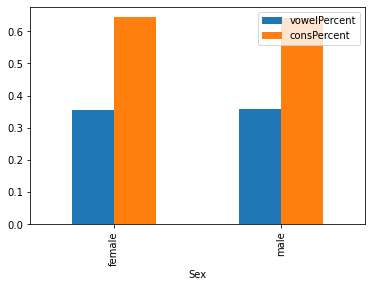

In [30]:
# plot
percent.plot.bar()

<AxesSubplot:xlabel='Sex', ylabel='consPercent'>

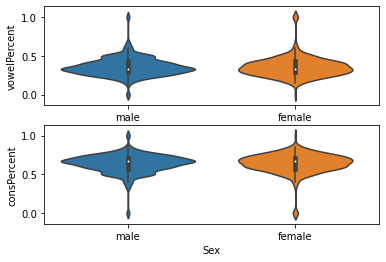

In [31]:
# violinplot
plt.subplot(2,1,1)
sns.violinplot( data = titanic, x = "Sex", y = "vowelPercent")
plt.subplot(2,1,2)
sns.violinplot( data = titanic, x = "Sex", y = "consPercent")